In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Descriptive analysis

## GPD

In [2]:
# Load the CSV file(s) as reviews.
QOQ4_growth = pd.read_csv('GDP_q-on-q4 growth quarter growth CP SA %.csv') 

In [3]:
# View the DataFrame.
print(QOQ4_growth.head())
print(QOQ4_growth.info())
QOQ4_growth.describe() 

      Time  Rate
0  1956 Q1   9.0
1  1956 Q2  10.0
2  1956 Q3   7.7
3  1956 Q4   8.4
4  1957 Q1   5.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    274 non-null    object 
 1   Rate    274 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB
None


,Rate
count,274.000000
mean,7.659124
std,5.271814
min,-14.400000
25%,4.400000
50%,6.200000
75%,10.200000
max,26.900000


In [4]:
# Function to convert quarter to date
def convert_quarter_to_date(quarter_str):
    year, quarter = quarter_str.split(' Q')
    quarter_end_dates = {
        '1': '-03-31',
        '2': '-06-30',
        '3': '-09-30',
        '4': '-12-31'
    }
    return pd.to_datetime(year + quarter_end_dates[quarter])
        
# Apply the function to the 'Quarter' column
QOQ4_growth['Formatted_Time'] = QOQ4_growth['Time'].apply(convert_quarter_to_date)

# Display the updated DataFrame
print(QOQ4_growth)

        Time  Rate Formatted_Time
0    1956 Q1   9.0     1956-03-31
1    1956 Q2  10.0     1956-06-30
2    1956 Q3   7.7     1956-09-30
3    1956 Q4   8.4     1956-12-31
4    1957 Q1   5.8     1957-03-31
..       ...   ...            ...
269  2023 Q2   8.8     2023-06-30
270  2023 Q3   7.7     2023-09-30
271  2023 Q4   4.9     2023-12-31
272  2024 Q1   4.1     2024-03-31
273  2024 Q2   3.3     2024-06-30

[274 rows x 3 columns]


In [5]:
# Calculating the 12-month moving average
QOQ4_growth_MA = QOQ4_growth.copy()

print(QOQ4_growth_MA)

# Calculating the 12-month moving average
QOQ4_growth_MA['12_month_moving_avg'] = QOQ4_growth_MA['Rate'].rolling(window=4).mean()

QOQ4_growth_MA.head(20)

        Time  Rate Formatted_Time
0    1956 Q1   9.0     1956-03-31
1    1956 Q2  10.0     1956-06-30
2    1956 Q3   7.7     1956-09-30
3    1956 Q4   8.4     1956-12-31
4    1957 Q1   5.8     1957-03-31
..       ...   ...            ...
269  2023 Q2   8.8     2023-06-30
270  2023 Q3   7.7     2023-09-30
271  2023 Q4   4.9     2023-12-31
272  2024 Q1   4.1     2024-03-31
273  2024 Q2   3.3     2024-06-30

[274 rows x 3 columns]


,Time,Rate,Formatted_Time,12_month_moving_avg
0,1956 Q1,9.0,1956-03-31,NaN
1,1956 Q2,10.0,1956-06-30,NaN
2,1956 Q3,7.7,1956-09-30,NaN
3,1956 Q4,8.4,1956-12-31,8.775
4,1957 Q1,5.8,1957-03-31,7.975
5,1957 Q2,5.9,1957-06-30,6.950
6,1957 Q3,6.6,1957-09-30,6.675
7,1957 Q4,5.9,1957-12-31,6.050
8,1958 Q1,7.8,1958-03-31,6.550
9,1958 Q2,4.8,1958-06-30,6.275


In [6]:
# Filter the DataFrame for data from 2000 Q1 onwards and before 2023
QOQ4_growth_MA_after2000 = QOQ4_growth_MA[(QOQ4_growth_MA['Formatted_Time'] > '1998-12-31') & (QOQ4_growth_MA['Formatted_Time'] < '2023-01-01')]

# Display the subset of data
print(QOQ4_growth_MA_after2000)

        Time  Rate Formatted_Time  12_month_moving_avg
172  1999 Q1   4.0     1999-03-31                4.300
173  1999 Q2   4.2     1999-06-30                4.075
174  1999 Q3   4.4     1999-09-30                4.450
175  1999 Q4   5.3     1999-12-31                4.475
176  2000 Q1   6.4     2000-03-31                5.075
..       ...   ...            ...                  ...
263  2021 Q4  11.1     2021-12-31                9.075
264  2022 Q1  13.4     2022-03-31               13.225
265  2022 Q2  10.0     2022-06-30               10.875
266  2022 Q3   9.4     2022-09-30               10.975
267  2022 Q4   9.5     2022-12-31               10.575

[96 rows x 4 columns]


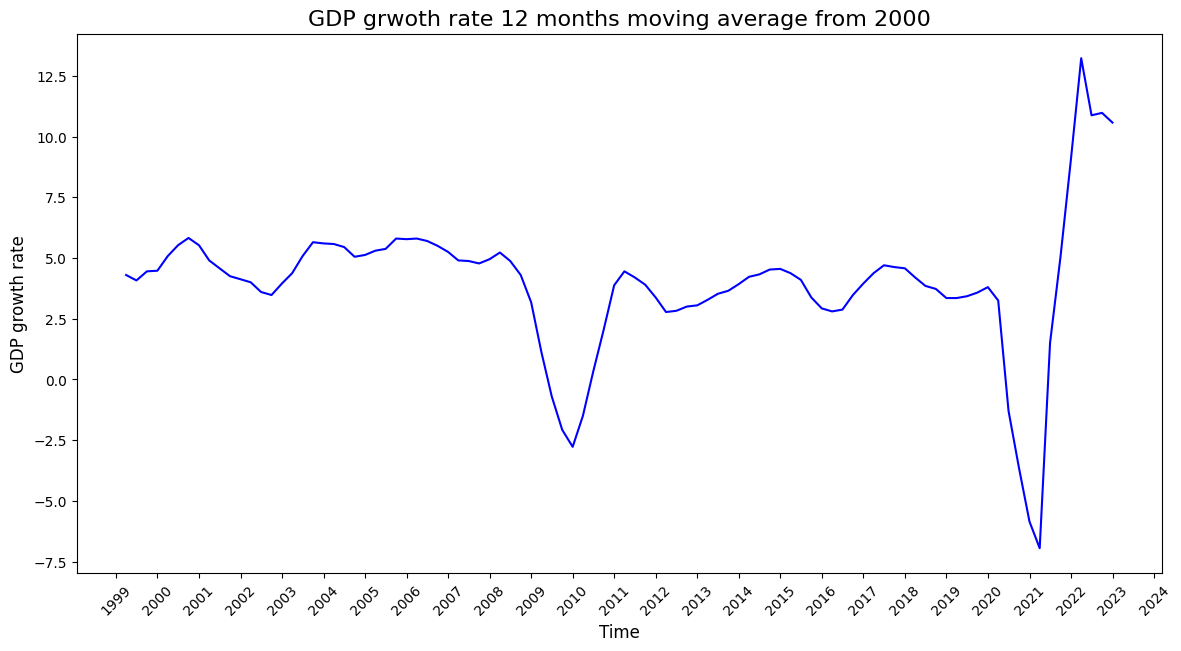

In [7]:
# Set the frame size
plt.figure(figsize=(14, 7))

# Create a lineplot.
plt.plot(QOQ4_growth_MA_after2000['Formatted_Time'], QOQ4_growth_MA_after2000['12_month_moving_avg'], color='blue', linestyle='-')

# Set the title using Seaborn
plt.title('GDP grwoth rate 12 months moving average from 2000', fontsize=16)

# Set the xlabel using Seaborn
plt.xlabel('Time', fontsize=12)

# Set the ylabel using Seaborn
plt.ylabel('GDP growth rate', fontsize=12)

# Set the x-axis tick frequency to show ticks at every year
locator = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Increase the number of x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

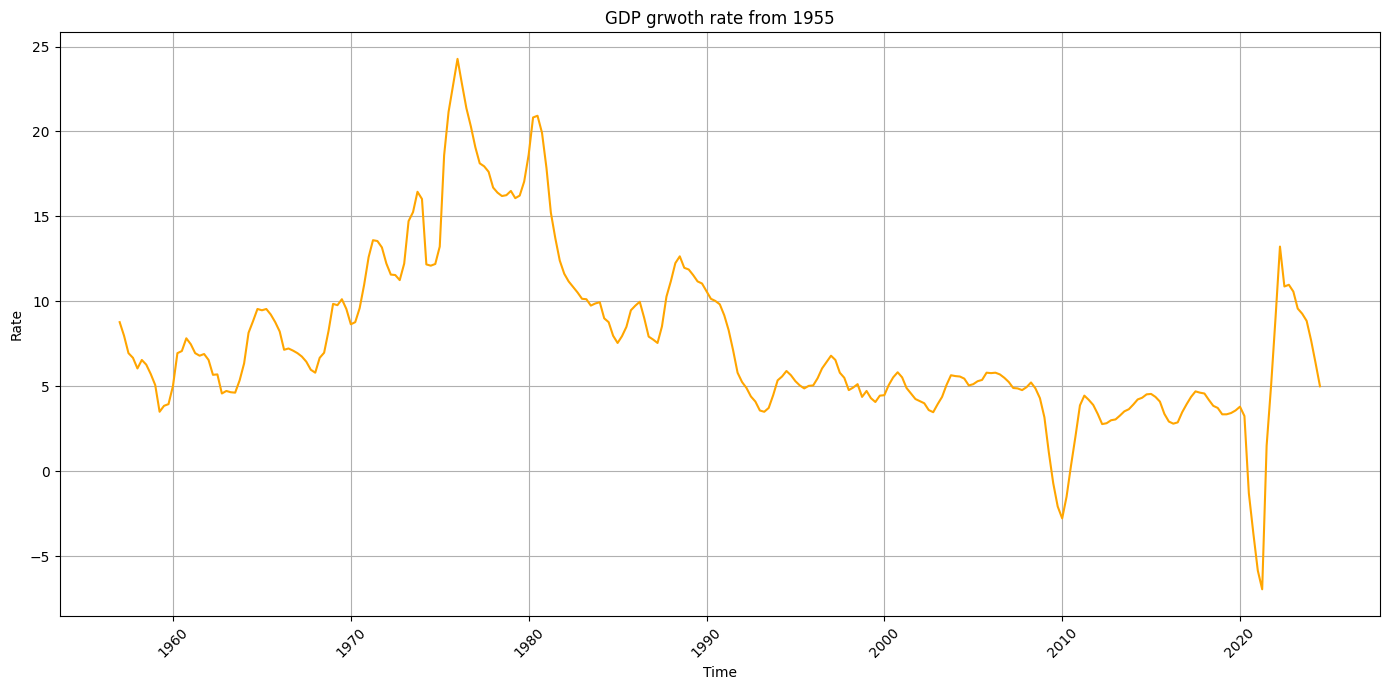

In [8]:
# Create a time scatter plot
plt.figure(figsize=(14, 7))
plt.plot(QOQ4_growth_MA['Formatted_Time'], QOQ4_growth_MA['12_month_moving_avg'], color='orange', linestyle='-')
plt.title('GDP grwoth rate from 1955')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

## FTSE

In [9]:
# Load the CSV file(s) as reviews.
FTSE100 = pd.read_excel('FTSE100PriceHistory.xlsx')
FTSE250 = pd.read_excel('FTSE250PriceHistory.xlsx')

# View the DataFrame.
print(FTSE100.head())
print(FTSE250.head())

        Date  Price  CVol  Change  % Change  Total Return (Gross, Unhedged)  \
0 1985-01-31    NaN   NaN     NaN       NaN                             NaN   
1 1985-02-28    NaN   NaN     NaN       NaN                             NaN   
2 1985-03-29    NaN   NaN     NaN       NaN                             NaN   
3 1985-04-30    NaN   NaN     NaN       NaN                             NaN   
4 1985-05-31    NaN   NaN     NaN       NaN                             NaN   

   Cumulative Return % (Gross, Unhedged)  Open    High     Low  
0                                    NaN   NaN  1305.7  1206.1  
1                                    NaN   NaN  1297.5  1258.8  
2                                    NaN   NaN  1309.9  1250.8  
3                                    NaN   NaN  1305.5  1269.3  
4                                    NaN   NaN  1342.4  1301.5  
        Date  Price  CVol  Change  % Change  Total Return (Gross, Unhedged)  \
0 1985-01-31    NaN   NaN     NaN       NaN             

In [10]:
# Filter the DataFrame for data from 2000 Q1 onwards and before 2023
FTSE100_after2000 = FTSE100[(FTSE100['Date'] > '1998-12-31') & (FTSE100['Date'] < '2023-01-01')]
FTSE250_after2000 = FTSE250[(FTSE250['Date'] > '1998-12-31') & (FTSE250['Date'] < '2023-01-01')]

# Display the subset of data
print(FTSE100_after2000)
print(FTSE250_after2000)

          Date        Price          CVol      Change  % Change  \
168 1999-01-29  5896.000000  6.991341e+08   13.419922  0.228130   
169 1999-02-26  6175.100098  5.440346e+08  279.100098  4.733719   
170 1999-03-31  6295.330078  5.213120e+08  120.229980  1.947013   
171 1999-04-30  6552.180176  5.244211e+08  256.850098  4.080010   
172 1999-05-28  6226.220215           NaN -325.959961 -4.974832   
..         ...          ...           ...         ...       ...   
451 2022-08-31  7284.152112  1.440875e+09 -139.280777 -1.876231   
452 2022-09-30  6893.809515  1.288090e+09 -390.342597 -5.358792   
453 2022-10-31  7094.529400  9.786009e+08  200.719885  2.911596   
454 2022-11-30  7573.050697  1.579951e+09  478.521297  6.744934   
455 2022-12-30  7451.737763  2.919144e+08 -121.312933 -1.601903   

     Total Return (Gross, Unhedged)  Cumulative Return % (Gross, Unhedged)  \
168                     2611.239990                             632.588927   
169                     2739.260010    

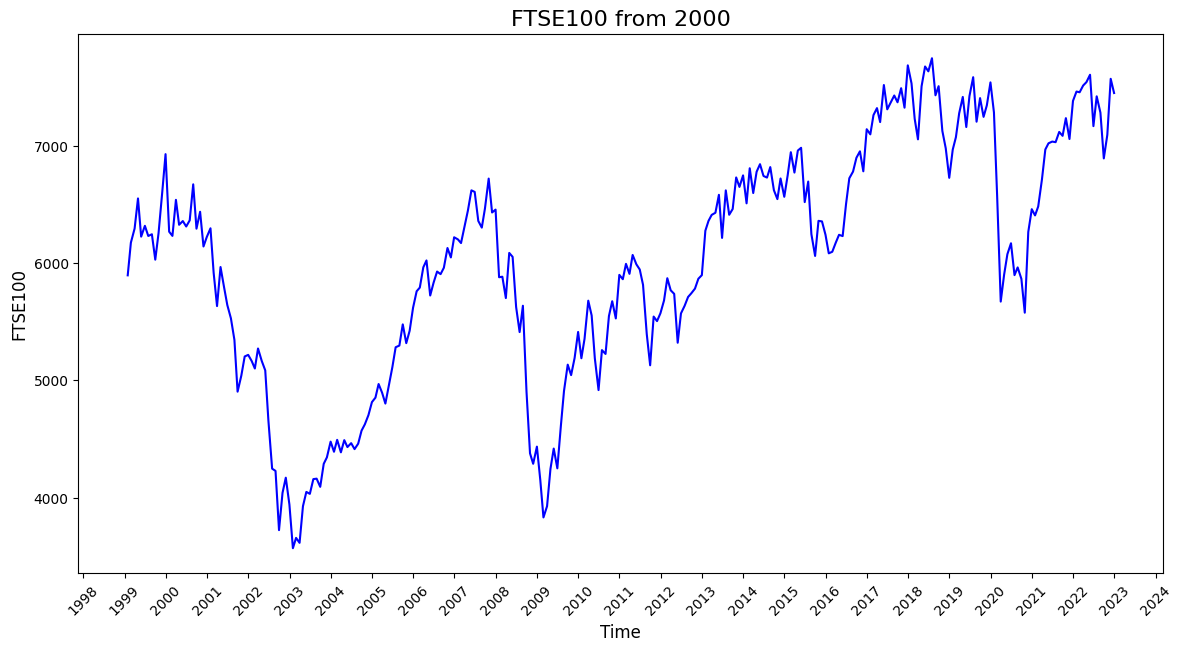

In [11]:
# Set the frame size
plt.figure(figsize=(14, 7))

# Create a lineplot.
plt.plot(FTSE100_after2000['Date'], FTSE100_after2000['Price'], color='blue', linestyle='-')

# Set the title
plt.title('FTSE100 from 2000', fontsize=16)

# Set the xlabel
plt.xlabel('Time', fontsize=12)

# Set the ylabel
plt.ylabel('FTSE100', fontsize=12)

# Set the x-axis tick frequency to show ticks at every year
locator = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Increase the number of x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

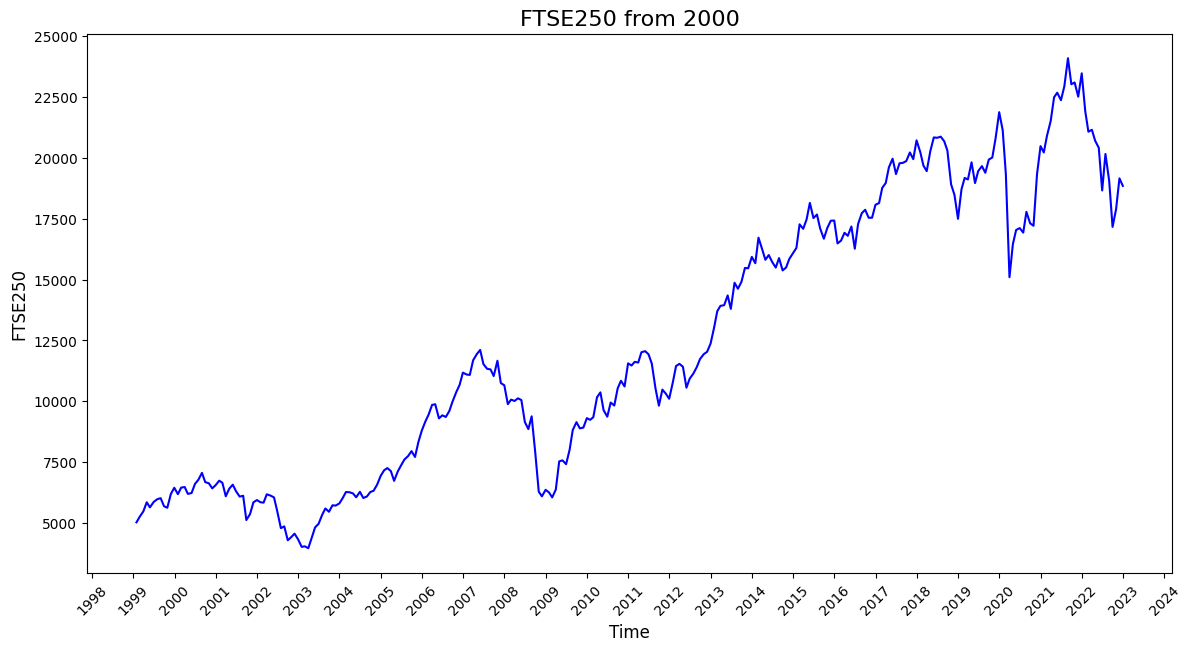

In [12]:
# Set the frame size
plt.figure(figsize=(14, 7))

# Create a lineplot.
plt.plot(FTSE250_after2000['Date'], FTSE250_after2000['Price'], color='blue', linestyle='-')

# Set the title
plt.title('FTSE250 from 2000', fontsize=16)

# Set the xlabel
plt.xlabel('Time', fontsize=12)

# Set the ylabel
plt.ylabel('FTSE250', fontsize=12)

# Set the x-axis tick frequency to show ticks at every year
locator = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Increase the number of x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

## 10 Years Bond Yield

In [13]:
# Load the CSV file(s) as reviews.
ten_year_bond = pd.read_csv('United Kingdom 10-Year Bond Yield Historical Data.csv') 
germany_bond = pd.read_csv('Germany 10-Year Bond Yield Historical Data.csv') 
france_bond = pd.read_csv('France 10-Year Bond Yield Historical Data.csv') 
us_bond = pd.read_csv('United States 10-Year Bond Yield Historical Data.csv') 

In [14]:
# Convert the 'date_string' column to datetime format
ten_year_bond['Date'] = pd.to_datetime(ten_year_bond['Date'], format="%m/%d/%Y")
germany_bond['Date'] = pd.to_datetime(ten_year_bond['Date'], format="%m/%d/%Y")
france_bond['Date'] = pd.to_datetime(ten_year_bond['Date'], format="%m/%d/%Y")
us_bond['Date'] = pd.to_datetime(ten_year_bond['Date'], format="%m/%d/%Y")

# Display the updated DataFrame
print(ten_year_bond)
print(germany_bond)
print(france_bond)
print(us_bond)

          Date   Price    Open    High     Low Change %
0   2024-10-01   4.281   4.006   4.314   3.915    6.78%
1   2024-09-01   4.009   4.044   4.063   3.731   -0.17%
2   2024-08-01   4.016   3.939   4.030   3.742    1.13%
3   2024-07-01   3.971   4.207   4.293   3.969   -4.91%
4   2024-06-01   4.176   4.306   4.335   4.003   -3.42%
..         ...     ...     ...     ...     ...      ...
544 1979-06-01  12.270  12.270  12.270  12.270    7.54%
545 1979-05-01  11.410  11.410  11.410  11.410    2.79%
546 1979-04-01  11.100  11.100  11.100  11.100    1.65%
547 1979-03-01  10.920  10.920  10.920  10.920  -10.93%
548 1979-02-01  12.260  12.260  12.260  12.260   -8.64%

[549 rows x 6 columns]
          Date   Price   Open    High     Low Change %
0   2024-10-01  2.3765  2.390  2.4965  2.3505   -0.65%
1   2024-09-01  2.3920  2.126  2.4470  2.0110   12.20%
2   2024-08-01  2.1320  2.301  2.3490  2.0860   -6.90%
3   2024-07-01  2.2900  2.304  2.3040  2.0740   -0.52%
4   2024-06-01  2.3020  2.541

In [15]:
# Subtract one month and then set it to the end of the previous month
ten_year_bond['Date'] = (ten_year_bond['Date'] - pd.DateOffset(months=1)) + pd.offsets.MonthEnd(0)
germany_bond['Date'] = (germany_bond['Date'] - pd.DateOffset(months=1)) + pd.offsets.MonthEnd(0)
france_bond['Date'] = (france_bond['Date'] - pd.DateOffset(months=1)) + pd.offsets.MonthEnd(0)
us_bond['Date'] = (us_bond['Date'] - pd.DateOffset(months=1)) + pd.offsets.MonthEnd(0)

# Display the updated DataFrame
print(ten_year_bond)
print(germany_bond)
print(france_bond)
print(us_bond)

          Date   Price    Open    High     Low Change %
0   2024-09-30   4.281   4.006   4.314   3.915    6.78%
1   2024-08-31   4.009   4.044   4.063   3.731   -0.17%
2   2024-07-31   4.016   3.939   4.030   3.742    1.13%
3   2024-06-30   3.971   4.207   4.293   3.969   -4.91%
4   2024-05-31   4.176   4.306   4.335   4.003   -3.42%
..         ...     ...     ...     ...     ...      ...
544 1979-05-31  12.270  12.270  12.270  12.270    7.54%
545 1979-04-30  11.410  11.410  11.410  11.410    2.79%
546 1979-03-31  11.100  11.100  11.100  11.100    1.65%
547 1979-02-28  10.920  10.920  10.920  10.920  -10.93%
548 1979-01-31  12.260  12.260  12.260  12.260   -8.64%

[549 rows x 6 columns]
          Date   Price   Open    High     Low Change %
0   2024-09-30  2.3765  2.390  2.4965  2.3505   -0.65%
1   2024-08-31  2.3920  2.126  2.4470  2.0110   12.20%
2   2024-07-31  2.1320  2.301  2.3490  2.0860   -6.90%
3   2024-06-30  2.2900  2.304  2.3040  2.0740   -0.52%
4   2024-05-31  2.3020  2.541

In [16]:
# Filter the DataFrame for data from 2000 Q1 onwards
ten_year_bond_after2000 = ten_year_bond[(ten_year_bond['Date'] > '1998-12-31') & (ten_year_bond['Date'] <= '2023-01-01')]

# Display the subset of data
print(ten_year_bond_after2000)

# Filter the DataFrame for data from 2000 Q1 onwards
germany_bond_after2000 = germany_bond[(germany_bond['Date'] > '1998-12-31') & (germany_bond['Date'] <= '2023-01-01')]

# Display the subset of data
print(germany_bond_after2000)

# Filter the DataFrame for data from 2000 Q1 onwards
france_bond_after2000 = france_bond[(france_bond['Date'] > '1998-12-31') & (france_bond['Date'] <= '2023-01-01')]

# Display the subset of data
print(france_bond_after2000)

# Filter the DataFrame for data from 2000 Q1 onwards
us_bond_after2000 = us_bond[(us_bond['Date'] > '1998-12-31') & (us_bond['Date'] <= '2023-01-01')]

# Display the subset of data
print(us_bond_after2000)

          Date  Price   Open   High    Low Change %
21  2022-12-31  3.334  3.622  3.671  3.177   -9.13%
22  2022-11-30  3.669  3.084  3.761  3.007   16.00%
23  2022-10-31  3.163  3.486  3.689  2.899  -10.22%
24  2022-09-30  3.523  4.053  4.632  3.378  -13.99%
25  2022-08-31  4.096  2.861  4.582  2.824   46.34%
..         ...    ...    ...    ...    ...      ...
304 1999-05-31  5.058  5.058  5.058  5.058    4.10%
305 1999-04-30  4.859  4.859  4.859  4.859    5.68%
306 1999-03-31  4.598  4.598  4.598  4.598    0.48%
307 1999-02-28  4.576  4.576  4.576  4.576   -1.10%
308 1999-01-31  4.627  4.627  4.627  4.627   11.04%

[288 rows x 6 columns]
          Date  Price   Open   High    Low Change %
21  2022-12-31  2.643  2.271  2.710  2.042   15.92%
22  2022-11-30  2.280  2.550  2.569  1.967  -11.04%
23  2022-10-31  2.563  1.863  2.569  1.753   31.84%
24  2022-09-30  1.944  2.108  2.378  1.802   -9.58%
25  2022-08-31  2.150  2.114  2.532  1.769    1.94%
..         ...    ...    ...    ...    .

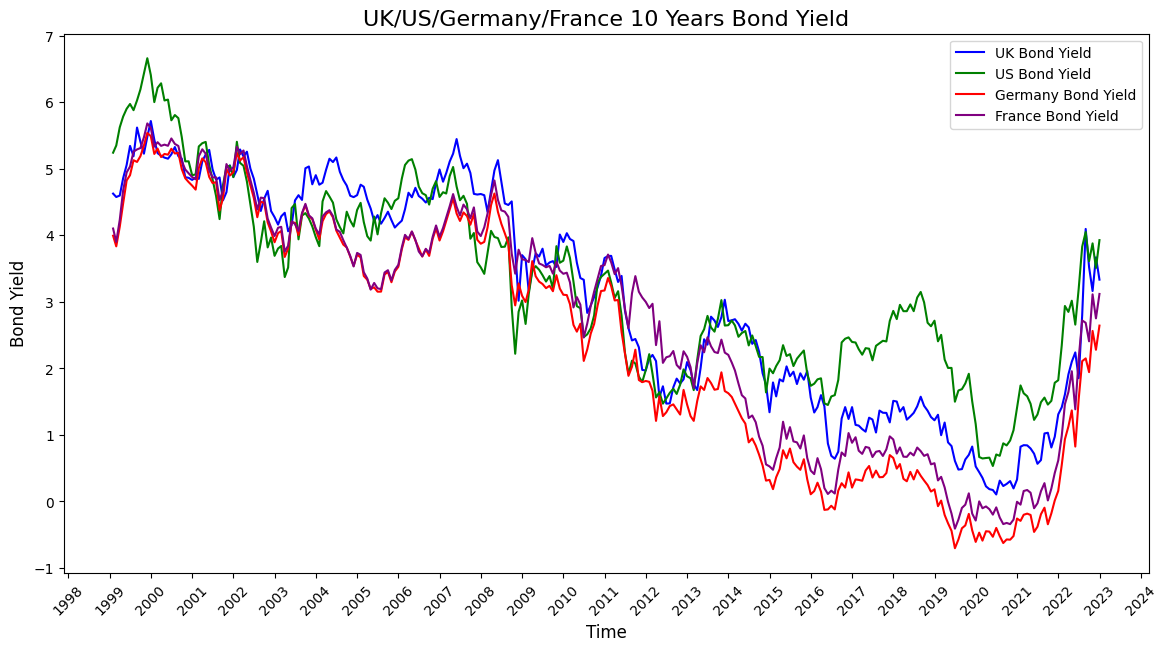

In [17]:
# Set the frame size
fig, ax1 = plt.subplots(figsize=(14, 7))

# Create the first line plot on ax1
ax1.plot(ten_year_bond_after2000['Date'], ten_year_bond_after2000['Price'], color='blue', linestyle='-', label='UK Bond Yield')
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Bond Yield', fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Plot additional lines for US/Germany/France Bond Yields on the same y-axis
ax1.plot(us_bond_after2000['Date'], us_bond_after2000['Price'], color='green', linestyle='-', label='US Bond Yield')
ax1.plot(germany_bond_after2000['Date'], germany_bond_after2000['Price'], color='red', linestyle='-', label='Germany Bond Yield')
ax1.plot(france_bond_after2000['Date'], france_bond_after2000['Price'], color='purple', linestyle='-', label='France Bond Yield')

# Set the title
plt.title('UK/US/Germany/France 10 Years Bond Yield', fontsize=16)

# Set the x-axis tick frequency to show ticks at every year
locator = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Increase the number of x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add legend
ax1.legend(loc='upper right')

# Show the plot
plt.show()

# Inferential analysis and correlation

## Import FinBert sentiment data analysis dataset

In [18]:
# Import
bert_sentiment_uk = pd.read_csv('bert_sentiment_uk.csv')

In [19]:
# View
bert_sentiment_uk.head(5)

,reference,country,date,quarter,year_month,weekday,year,title,author,is_gov,len,text,speech_tokens,filtered_tokens,finbert_pos,finbert_neg,finbert_neu,finbert_sentiment,finbert_score,team_sentiment
0,r980915a_BOE,united kingdom,1998-09-15,1998Q3,1998-09-01,Tuesday,1998,Speech,george,0,13731,thank you chairman im actually very pleased to...,"['thank', 'you', 'chairman', 'im', 'actually',...","['thank', 'chairman', 'im', 'actually', 'pleas...",0.087535,0.325207,0.587258,neutral,-0.237672,neutral-negative
1,r981021b_BOE,united kingdom,1998-10-21,1998Q4,1998-10-01,Wednesday,1998,Britain in Europe,george,0,24263,its a great pleasure to be here in the beautif...,"['its', 'a', 'great', 'pleasure', 'to', 'be', ...","['great', 'pleasure', 'beautiful', 'city', 'br...",0.212209,0.017505,0.770286,neutral,0.194704,neutral-positive
2,r981021a_BOE,united kingdom,1998-10-21,1998Q4,1998-10-01,Wednesday,1998,Impact of the recent turbulence in internation...,king,1,13678,few industries have suffered more from volatil...,"['few', 'industries', 'have', 'suffered', 'mor...","['industries', 'suffered', 'volatility', 'brit...",0.047679,0.476351,0.475970,negative,-0.428672,negative
3,r981101a_BOE,united kingdom,1998-11-01,1998Q4,1998-11-01,Sunday,1998,"Economic policy, with and without forecasts",budd,0,27679,my topic this evening is the use of forecasts ...,"['my', 'topic', 'this', 'evening', 'is', 'the'...","['topic', 'evening', 'use', 'forecasts', 'econ...",0.046829,0.049165,0.904007,neutral,-0.002336,neutral
4,r981101b_BOE,united kingdom,1998-11-01,1998Q4,1998-11-01,Sunday,1998,Inflation targeting in practice: the UK experi...,vickers,0,27693,six years ago this week sterling left the exch...,"['six', 'years', 'ago', 'this', 'week', 'sterl...","['six', 'years', 'ago', 'week', 'sterling', 'l...",0.035134,0.049842,0.915023,neutral,-0.014708,neutral


In [20]:
# Shape
bert_sentiment_uk.shape

(1209, 20)

### Data manipulation on the sentiment score dataset

In [21]:
# Convert to DateTime
bert_sentiment_uk['date'] = pd.to_datetime(bert_sentiment_uk['date'])
bert_sentiment_uk['year_month'] = pd.to_datetime(bert_sentiment_uk['year_month'])
bert_sentiment_uk['quarter'] = pd.PeriodIndex(bert_sentiment_uk['date'], freq='Q')

In [22]:
# View
bert_sentiment_uk.head(2)

,reference,country,date,quarter,year_month,weekday,year,title,author,is_gov,len,text,speech_tokens,filtered_tokens,finbert_pos,finbert_neg,finbert_neu,finbert_sentiment,finbert_score,team_sentiment
0,r980915a_BOE,united kingdom,1998-09-15,1998Q3,1998-09-01,Tuesday,1998,Speech,george,0,13731,thank you chairman im actually very pleased to...,"['thank', 'you', 'chairman', 'im', 'actually',...","['thank', 'chairman', 'im', 'actually', 'pleas...",0.087535,0.325207,0.587258,neutral,-0.237672,neutral-negative
1,r981021b_BOE,united kingdom,1998-10-21,1998Q4,1998-10-01,Wednesday,1998,Britain in Europe,george,0,24263,its a great pleasure to be here in the beautif...,"['its', 'a', 'great', 'pleasure', 'to', 'be', ...","['great', 'pleasure', 'beautiful', 'city', 'br...",0.212209,0.017505,0.770286,neutral,0.194704,neutral-positive


In [23]:
# Changing the year_month to the end of each month to match with the external data
# Ensure 'Date' column is of datetime type
bert_sentiment_uk['year_month'] = pd.to_datetime(bert_sentiment_uk['year_month'])

# Offset 'Date' to the last day of the month
bert_sentiment_uk['year_month'] = bert_sentiment_uk['year_month'] + pd.offsets.MonthEnd(0)

bert_sentiment_uk.head()

,reference,country,date,quarter,year_month,weekday,year,title,author,is_gov,len,text,speech_tokens,filtered_tokens,finbert_pos,finbert_neg,finbert_neu,finbert_sentiment,finbert_score,team_sentiment
0,r980915a_BOE,united kingdom,1998-09-15,1998Q3,1998-09-30,Tuesday,1998,Speech,george,0,13731,thank you chairman im actually very pleased to...,"['thank', 'you', 'chairman', 'im', 'actually',...","['thank', 'chairman', 'im', 'actually', 'pleas...",0.087535,0.325207,0.587258,neutral,-0.237672,neutral-negative
1,r981021b_BOE,united kingdom,1998-10-21,1998Q4,1998-10-31,Wednesday,1998,Britain in Europe,george,0,24263,its a great pleasure to be here in the beautif...,"['its', 'a', 'great', 'pleasure', 'to', 'be', ...","['great', 'pleasure', 'beautiful', 'city', 'br...",0.212209,0.017505,0.770286,neutral,0.194704,neutral-positive
2,r981021a_BOE,united kingdom,1998-10-21,1998Q4,1998-10-31,Wednesday,1998,Impact of the recent turbulence in internation...,king,1,13678,few industries have suffered more from volatil...,"['few', 'industries', 'have', 'suffered', 'mor...","['industries', 'suffered', 'volatility', 'brit...",0.047679,0.476351,0.475970,negative,-0.428672,negative
3,r981101a_BOE,united kingdom,1998-11-01,1998Q4,1998-11-30,Sunday,1998,"Economic policy, with and without forecasts",budd,0,27679,my topic this evening is the use of forecasts ...,"['my', 'topic', 'this', 'evening', 'is', 'the'...","['topic', 'evening', 'use', 'forecasts', 'econ...",0.046829,0.049165,0.904007,neutral,-0.002336,neutral
4,r981101b_BOE,united kingdom,1998-11-01,1998Q4,1998-11-30,Sunday,1998,Inflation targeting in practice: the UK experi...,vickers,0,27693,six years ago this week sterling left the exch...,"['six', 'years', 'ago', 'this', 'week', 'sterl...","['six', 'years', 'ago', 'week', 'sterling', 'l...",0.035134,0.049842,0.915023,neutral,-0.014708,neutral


### Create monthly average sentiment score

In [24]:
# Create monthly average DataFrame
avg_bert = pd.DataFrame(bert_sentiment_uk.groupby('year_month')['finbert_score'].mean())
avg_bert = bert_sentiment_uk.groupby('year_month')['finbert_score'].mean().reset_index()


In [25]:
# Filter the DataFrame for data from 1999 Q1 onwards
avg_bert_after2000 = avg_bert[avg_bert['year_month'] > '1998-12-31']

# Display the subset of data
print(avg_bert_after2000)

    year_month  finbert_score
4   1999-01-31       0.292472
5   1999-02-28      -0.094355
6   1999-03-31       0.063909
7   1999-05-31      -0.092661
8   1999-06-30       0.295987
..         ...            ...
267 2022-05-31       0.039841
268 2022-06-30       0.067949
269 2022-07-31       0.079329
270 2022-09-30      -0.103491
271 2022-10-31      -0.031868

[268 rows x 2 columns]


### Create quarterly average sentiment score

In [26]:
# Create quarterly average DataFrame
quart_bert = bert_sentiment_uk.groupby('quarter')['finbert_score'].mean().reset_index()
quart_bert['quarter'] = quart_bert['quarter'].dt.to_timestamp()
quart_bert['quarter'] = quart_bert['quarter'] + pd.offsets.QuarterEnd(0)

# Display the updated DataFrames
print(quart_bert)

      quarter  finbert_score
0  1998-09-30      -0.237672
1  1998-12-31      -0.116431
2  1999-03-31       0.041918
3  1999-06-30       0.053082
4  1999-09-30      -0.007517
..        ...            ...
93 2021-12-31       0.093146
94 2022-03-31       0.054198
95 2022-06-30       0.017444
96 2022-09-30       0.006201
97 2022-12-31      -0.031868

[98 rows x 2 columns]


In [27]:
# Filter the DataFrame for data from 2000 Q1 onwards
quart_bert_after2000 = quart_bert[quart_bert['quarter'] > '1998-12-31']

# Display the subset of data
print(quart_bert_after2000)

      quarter  finbert_score
2  1999-03-31       0.041918
3  1999-06-30       0.053082
4  1999-09-30      -0.007517
5  1999-12-31      -0.032109
6  2000-03-31      -0.078866
..        ...            ...
93 2021-12-31       0.093146
94 2022-03-31       0.054198
95 2022-06-30       0.017444
96 2022-09-30       0.006201
97 2022-12-31      -0.031868

[96 rows x 2 columns]


### Create quartely 1 year moving average sentiment score

In [28]:
# Calculating the 12-month moving average
quart_bert_MA = quart_bert.copy()

print(quart_bert_MA)

# Calculating the 12-month moving average
quart_bert_MA['12_month_moving_avg'] = quart_bert_MA['finbert_score'].rolling(window=4).mean()

quart_bert_MA.head(20)

      quarter  finbert_score
0  1998-09-30      -0.237672
1  1998-12-31      -0.116431
2  1999-03-31       0.041918
3  1999-06-30       0.053082
4  1999-09-30      -0.007517
..        ...            ...
93 2021-12-31       0.093146
94 2022-03-31       0.054198
95 2022-06-30       0.017444
96 2022-09-30       0.006201
97 2022-12-31      -0.031868

[98 rows x 2 columns]


,quarter,finbert_score,12_month_moving_avg
0,1998-09-30,-0.237672,NaN
1,1998-12-31,-0.116431,NaN
2,1999-03-31,0.041918,NaN
3,1999-06-30,0.053082,-0.064776
4,1999-09-30,-0.007517,-0.007237
5,1999-12-31,-0.032109,0.013843
6,2000-03-31,-0.078866,-0.016353
7,2000-06-30,0.108247,-0.002562
8,2000-09-30,0.274143,0.067854
9,2000-12-31,-0.052928,0.062649


In [29]:
# Filter the DataFrame for data from 2000 Q1 onwards
quart_bert_MA_after2000 = quart_bert_MA[quart_bert_MA['quarter'] > '1999-04-01']

# Rename columns
quart_bert_MA_after2000 = quart_bert_MA_after2000.rename(columns={'quarter': 'Date', '12_month_moving_avg': 'moving_average'})

# Display the subset of data
print(quart_bert_MA_after2000)


         Date  finbert_score  moving_average
3  1999-06-30       0.053082       -0.064776
4  1999-09-30      -0.007517       -0.007237
5  1999-12-31      -0.032109        0.013843
6  2000-03-31      -0.078866       -0.016353
7  2000-06-30       0.108247       -0.002562
..        ...            ...             ...
93 2021-12-31       0.093146        0.022024
94 2022-03-31       0.054198        0.058665
95 2022-06-30       0.017444        0.046335
96 2022-09-30       0.006201        0.042747
97 2022-12-31      -0.031868        0.011494

[95 rows x 3 columns]


## GPD and Sentiment score

In [30]:
# Rename columns
QOQ4_growth_MA_after2000 = QOQ4_growth_MA_after2000.rename(columns={'Time': 'Quarter', 'Formatted_Time': 'Date', '12_month_moving_avg': '12_month_ma'})

QOQ4_growth_MA_after2000 = QOQ4_growth_MA_after2000[QOQ4_growth_MA_after2000['Date'] >'1999-04-01']

# Display the updated DataFrame
print(QOQ4_growth_MA_after2000)

     Quarter  Rate       Date  12_month_ma
173  1999 Q2   4.2 1999-06-30        4.075
174  1999 Q3   4.4 1999-09-30        4.450
175  1999 Q4   5.3 1999-12-31        4.475
176  2000 Q1   6.4 2000-03-31        5.075
177  2000 Q2   6.0 2000-06-30        5.525
..       ...   ...        ...          ...
263  2021 Q4  11.1 2021-12-31        9.075
264  2022 Q1  13.4 2022-03-31       13.225
265  2022 Q2  10.0 2022-06-30       10.875
266  2022 Q3   9.4 2022-09-30       10.975
267  2022 Q4   9.5 2022-12-31       10.575

[95 rows x 4 columns]


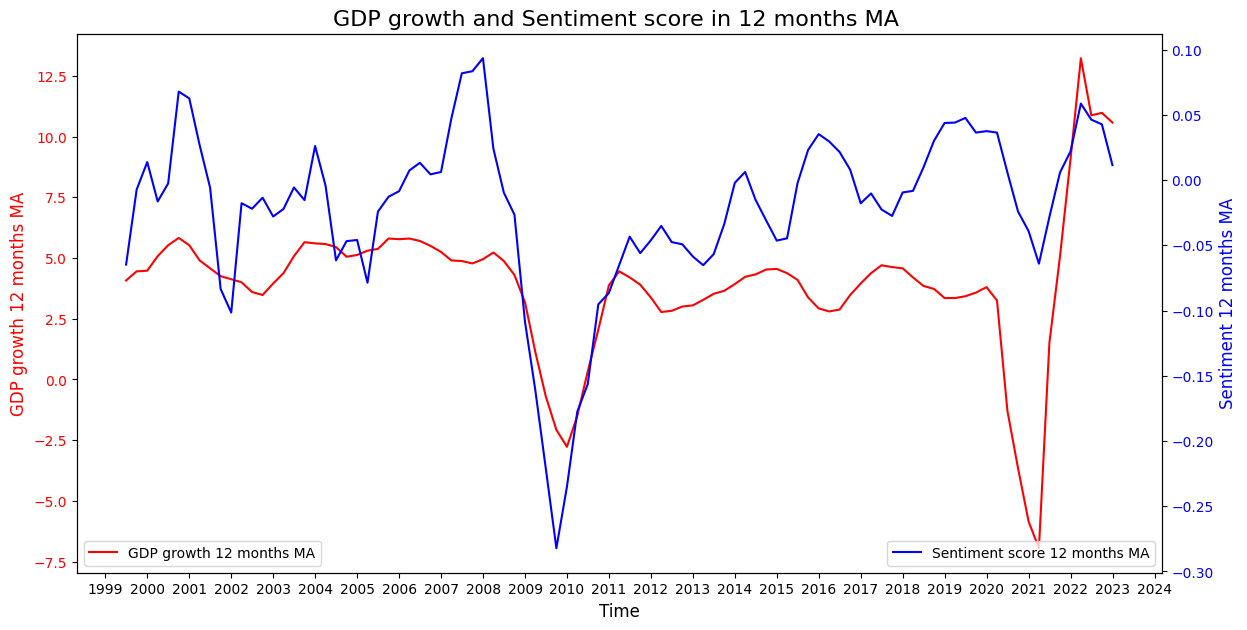

In [31]:
# Set the frame size
fig, ax1 = plt.subplots(figsize=(14, 7))

# Create the first line plot
ax1.plot(QOQ4_growth_MA_after2000['Date'], QOQ4_growth_MA_after2000['12_month_ma'], color='red', linestyle='-', label='GDP growth 12 months MA')
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('GDP growth 12 months MA', fontsize=12, color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Create the second y-axis
ax2 = ax1.twinx()
ax2.plot(quart_bert_MA_after2000['Date'], quart_bert_MA_after2000['moving_average'], color='blue', linestyle='-', label='Sentiment score 12 months MA')
ax2.set_ylabel('Sentiment 12 months MA', fontsize=12, color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Set the title
plt.title('GDP growth and Sentiment score in 12 months MA ', fontsize=16)

# Set the x-axis tick frequency to show ticks at every year
locator = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Add legends
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

# Increase the number of x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [32]:
# Export data for team members for other analysis
QOQ4_growth_MA_after2000.to_csv('GDP_GrowthRate_MA.csv', index=False)
quart_bert_MA_after2000.to_csv('FinberSentiment_MA.csv', index=False)

### Split the dataset to other time frame for the overall project analysis summary

In [33]:
# Split the dateset into 2007-2010 and 2018-2022
QOQ4_growth_MA_2007_2010 = QOQ4_growth_MA_after2000[(QOQ4_growth_MA_after2000['Date'] > '2006-12-31'\
                                                    ) & (QOQ4_growth_MA_after2000['Date'] < '2011-01-01')]
quart_bert_MA_2007_2010 = quart_bert_MA_after2000[(quart_bert_MA_after2000['Date'] > '2006-12-31'\
                                                     ) & (quart_bert_MA_after2000['Date'] < '2011-01-01')]
QOQ4_growth_MA_2018_2022 = QOQ4_growth_MA_after2000[(QOQ4_growth_MA_after2000['Date'] > '2017-12-31'\
                                                    ) & (QOQ4_growth_MA_after2000['Date'] < '2023-01-01')]
quart_bert_MA_2018_2022 = quart_bert_MA_after2000[(quart_bert_MA_after2000['Date'] > '2017-12-31'\
                                                     ) & (quart_bert_MA_after2000['Date'] < '2023-01-01')]

print(QOQ4_growth_MA_2007_2010)
print(quart_bert_MA_2007_2010)
print(QOQ4_growth_MA_2018_2022)
print(quart_bert_MA_2018_2022)

     Quarter  Rate       Date  12_month_ma
204  2007 Q1   4.4 2007-03-31        4.900
205  2007 Q2   5.2 2007-06-30        4.875
206  2007 Q3   5.0 2007-09-30        4.775
207  2007 Q4   5.2 2007-12-31        4.950
208  2008 Q1   5.5 2008-03-31        5.225
209  2008 Q2   3.8 2008-06-30        4.875
210  2008 Q3   2.7 2008-09-30        4.300
211  2008 Q4   0.7 2008-12-31        3.175
212  2009 Q1  -2.7 2009-03-31        1.125
213  2009 Q2  -3.5 2009-06-30       -0.700
214  2009 Q3  -2.8 2009-09-30       -2.075
215  2009 Q4  -2.1 2009-12-31       -2.775
216  2010 Q1   2.4 2010-03-31       -1.500
217  2010 Q2   3.8 2010-06-30        0.325
218  2010 Q3   4.1 2010-09-30        2.050
219  2010 Q4   5.2 2010-12-31        3.875
         Date  finbert_score  moving_average
34 2007-03-31       0.111425        0.047260
35 2007-06-30       0.177961        0.081892
36 2007-09-30       0.033574        0.083495
37 2007-12-31       0.050853        0.093453
38 2008-03-31      -0.166240        0.024037

### GDP hypothesis testing and correlation analysis

In [34]:
# Merge the GDP and Sentiment dataframes on 'Date'
GDP4_MA_Sentiment = pd.merge(QOQ4_growth_MA_after2000, quart_bert_MA_after2000, on='Date')

# Define independent variable (Rate) and dependent variable (score)
y = GDP4_MA_Sentiment['12_month_ma']
X = GDP4_MA_Sentiment['moving_average']

# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            12_month_ma   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     35.65
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           4.27e-08
Time:                        23:55:20   Log-Likelihood:                -219.82
No. Observations:                  95   AIC:                             443.6
Df Residuals:                      93   BIC:                             448.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4360      0.268     16.

In [35]:
# Calculate the Pearson correlation coefficient
correlation_coefficient = GDP4_MA_Sentiment['12_month_ma'].corr(GDP4_MA_Sentiment['moving_average'])

# Print the correlation coefficient
print("GDP & Sentiment Pearson correlation coefficient:", correlation_coefficient)

GDP & Sentiment Pearson correlation coefficient: 0.5264160240775496


##### P-value shows they are statistically significant and the correlation socre suggests decent positive correlation

In [36]:
# Merge the GDP and Sentiment dataframes on 'Date'
GDP4_MA_Sentiment_2007_2010 = pd.merge(QOQ4_growth_MA_2007_2010, quart_bert_MA_2007_2010, on='Date')

# Define independent variable (Rate) and dependent variable (score)
y = GDP4_MA_Sentiment_2007_2010['12_month_ma']
X = GDP4_MA_Sentiment_2007_2010['moving_average']

# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            12_month_ma   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     87.35
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           2.14e-07
Time:                        23:55:20   Log-Likelihood:                -23.159
No. Observations:                  16   AIC:                             50.32
Df Residuals:                      14   BIC:                             51.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.0015      0.328     12.

In [37]:
# Calculate the Pearson correlation coefficient
GDP4_MA_Sentiment_2007_2010 = GDP4_MA_Sentiment_2007_2010['12_month_ma'].corr(GDP4_MA_Sentiment_2007_2010['moving_average'])

# Print the correlation coefficient
print("GDP & Sentiment Pearson correlation coefficient:", correlation_coefficient)

GDP & Sentiment Pearson correlation coefficient: 0.5264160240775496


In [38]:
# Merge the GDP and Sentiment dataframes on 'Date'
GDP4_MA_Sentiment_2018_2022 = pd.merge(QOQ4_growth_MA_2018_2022, quart_bert_MA_2018_2022, on='Date')

# Define independent variable (Rate) and dependent variable (score)
y = GDP4_MA_Sentiment_2018_2022['12_month_ma']
X = GDP4_MA_Sentiment_2018_2022['moving_average']

# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            12_month_ma   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     22.15
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           0.000176
Time:                        23:55:20   Log-Likelihood:                -53.719
No. Observations:                  20   AIC:                             111.4
Df Residuals:                      18   BIC:                             113.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.9082      0.929      2.

In [39]:
# Calculate the Pearson correlation coefficient
GDP4_MA_Sentiment_2018_2022 = GDP4_MA_Sentiment_2018_2022['12_month_ma'].corr(GDP4_MA_Sentiment_2018_2022['moving_average'])

# Print the correlation coefficient
print("GDP & Sentiment Pearson correlation coefficient:", correlation_coefficient)

GDP & Sentiment Pearson correlation coefficient: 0.5264160240775496


## FTSE250 and Sentiment score

### Trying out the Monthly data visualisation

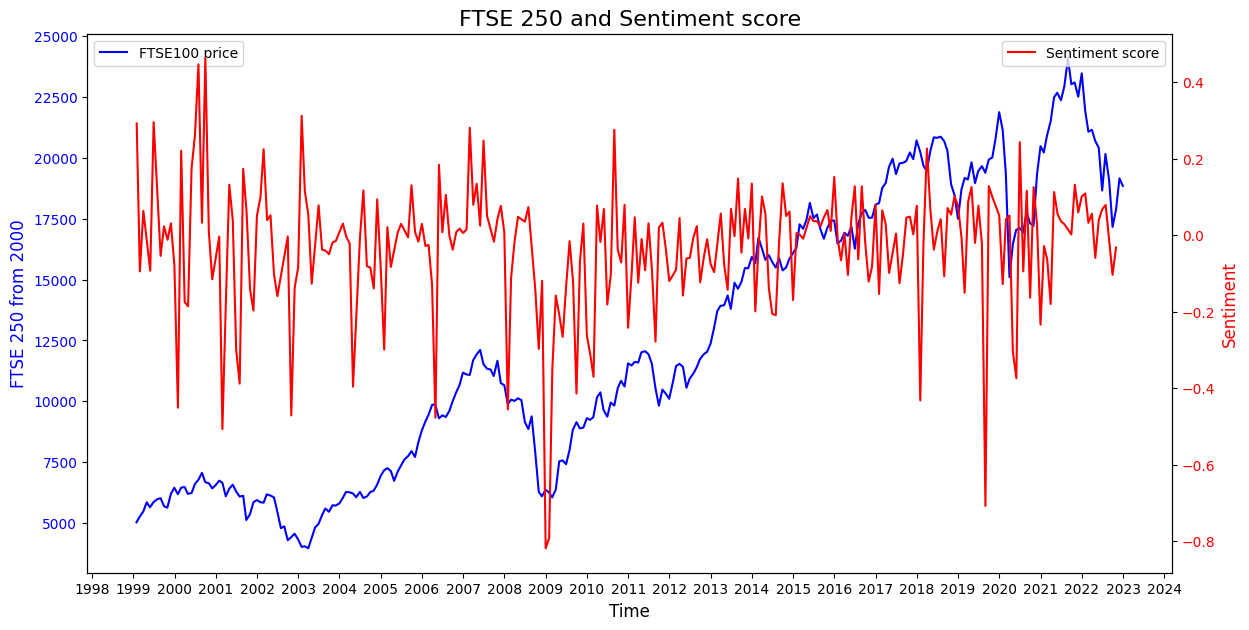

In [40]:
# FTSE 250 and sentiment score monthly visualisation
# Set the frame size
fig, ax1 = plt.subplots(figsize=(14, 7))

# Create the first line plot
ax1.plot(FTSE250_after2000['Date'], FTSE250_after2000['Price'], color='blue', linestyle='-', label='FTSE100 price')
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('FTSE 250 from 2000', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second y-axis
ax2 = ax1.twinx()
ax2.plot(avg_bert_after2000['year_month'], avg_bert_after2000['finbert_score'], color='red', linestyle='-', label='Sentiment score')
ax2.set_ylabel('Sentiment', fontsize=12, color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set the title
plt.title('FTSE 250 and Sentiment score', fontsize=16)

# Set the x-axis tick frequency to show ticks at every year
locator = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Increase the number of x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

##### Monthly visualisation is too noisy, trying to use quarterly data and see if it improves the chart

### Convert data to quarterly for analysis

In [41]:
# Resample to get the last month's price in each quarter
quarterly_FTSE250_after2000 = FTSE250_after2000[['Date','Price']]
quarterly_FTSE250_after2000 = quarterly_FTSE250_after2000.resample('Q', on='Date').last()

# Reset index to get 'Date' back as a column
quarterly_FTSE250_after2000 = quarterly_FTSE250_after2000.reset_index()

quarterly_FTSE250_after2000.head()

,Date,Price
0,1999-03-31,5475.200195
1,1999-06-30,5858.200195
2,1999-09-30,5687.109863
3,1999-12-31,6444.870117
4,2000-03-31,6475.140137


In [42]:
# Rename columns
quart_bert_after2000 = quart_bert_after2000.rename(columns={'quarter': 'Date'})
quart_bert_after2000.head()

,Date,finbert_score
2,1999-03-31,0.041918
3,1999-06-30,0.053082
4,1999-09-30,-0.007517
5,1999-12-31,-0.032109
6,2000-03-31,-0.078866


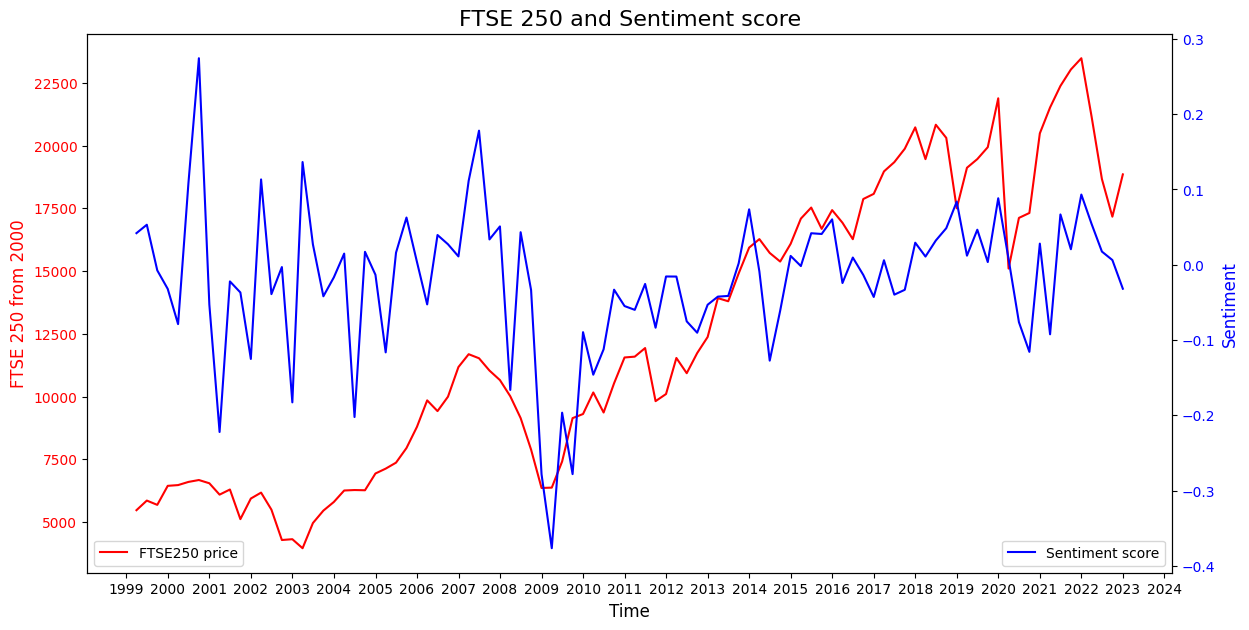

In [43]:
# Set the frame size
fig, ax1 = plt.subplots(figsize=(14, 7))

# Create the first line plot
ax1.plot(quarterly_FTSE250_after2000['Date'], quarterly_FTSE250_after2000['Price'], color='red', linestyle='-', label='FTSE250 price')
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('FTSE 250 from 2000', fontsize=12, color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Create the second y-axis
ax2 = ax1.twinx()
ax2.plot(quart_bert_after2000['Date'], quart_bert_after2000['finbert_score'], color='blue', linestyle='-', label='Sentiment score')
ax2.set_ylabel('Sentiment', fontsize=12, color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Set the title
plt.title('FTSE 250 and Sentiment score', fontsize=16)

# Set the x-axis tick frequency to show ticks at every year
locator = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Add legends
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

# Increase the number of x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

### Split the data into different time period for analysis

In [44]:
# Export dataframe in csv for team members
quarterly_FTSE250_after2000.to_csv('FTSE250.csv', index=False)
quart_bert_after2000.to_csv('FTSE250_Sentiment.csv', index=False)

In [45]:
# Split the data after 2006 for correlation and hypothesis testing
quarterly_FTSE250_after2006 = quarterly_FTSE250_after2000[quarterly_FTSE250_after2000['Date'] > '2005-12-31']
quart_bert_after2006 = quart_bert_after2000[quart_bert_after2000['Date'] > '2005-12-31']


In [46]:
# Split the data for 2007-2010 and 2018-2022 for the overall project analysis summary
quarterly_FTSE250_2007_2010 = quarterly_FTSE250_after2000[(quarterly_FTSE250_after2000['Date'] > '2006-12-31'\
                                                          ) & (quarterly_FTSE250_after2000['Date'] < '2011-01-01')]
quart_bert_2007_2010 = quart_bert_after2000[(quart_bert_after2000['Date'] > '2006-12-31'\
                                            ) & (quart_bert_after2000['Date'] < '2011-01-01')]
quarterly_FTSE250_2018_2022 = quarterly_FTSE250_after2000[(quarterly_FTSE250_after2000['Date'] > '2017-12-31'\
                                                          ) & (quarterly_FTSE250_after2000['Date'] < '2023-01-01')]
quart_bert_2018_2022 = quart_bert_after2000[(quart_bert_after2000['Date'] > '2017-12-31'\
                                            ) & (quart_bert_after2000['Date'] < '2023-01-01')]

print(quarterly_FTSE250_2007_2010)
print(quart_bert_2007_2010)
print(quarterly_FTSE250_2018_2022)
print(quart_bert_2018_2022)

         Date     Price
32 2007-03-31  11689.30
33 2007-06-30  11527.62
34 2007-09-30  11037.44
35 2007-12-31  10657.85
36 2008-03-31  10013.24
37 2008-06-30   9145.77
38 2008-09-30   7888.21
39 2008-12-31   6360.85
40 2009-03-31   6373.89
41 2009-06-30   7414.56
42 2009-09-30   9142.31
43 2009-12-31   9306.89
44 2010-03-31  10165.28
45 2010-06-30   9366.12
46 2010-09-30  10531.80
47 2010-12-31  11558.80
         Date  finbert_score
34 2007-03-31       0.111425
35 2007-06-30       0.177961
36 2007-09-30       0.033574
37 2007-12-31       0.050853
38 2008-03-31      -0.166240
39 2008-06-30       0.043147
40 2008-09-30      -0.033596
41 2008-12-31      -0.278111
42 2009-03-31      -0.376372
43 2009-06-30      -0.196440
44 2009-09-30      -0.277979
45 2009-12-31      -0.089575
46 2010-03-31      -0.146002
47 2010-06-30      -0.112237
48 2010-09-30      -0.033147
49 2010-12-31      -0.054878
         Date         Price
76 2018-03-31  19460.466080
77 2018-06-30  20830.966747
78 2018-09-30  

### Hypothesis testing and Correlation analysis for FTSE

In [47]:
# Merge the FTSE and Sentiment dataframes on 'Date'
FTSE250_Sentiment = pd.merge(quarterly_FTSE250_after2000, quart_bert_after2000, on='Date')

# Define independent variable (Rate) and dependent variable (score)
y = FTSE250_Sentiment['Price']
X = FTSE250_Sentiment['finbert_score']

# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     5.924
Date:                Sat, 16 Nov 2024   Prob (F-statistic):             0.0168
Time:                        23:55:21   Log-Likelihood:                -961.77
No. Observations:                  96   AIC:                             1928.
Df Residuals:                      94   BIC:                             1933.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.265e+04    572.369     22.105

In [48]:
# Calculate the Pearson correlation coefficient
correlation_coefficient = FTSE250_Sentiment['Price'].corr(FTSE250_Sentiment['finbert_score'])

# Print the correlation coefficient
print("FTSE & Sentiment Pearson correlation coefficient:", correlation_coefficient)

FTSE & Sentiment Pearson correlation coefficient: 0.24349111120840314


In [49]:
# Merge the FTSE and Sentiment dataframes on 'Date'
FTSE250_Sentiment = pd.merge(quarterly_FTSE250_after2006, quart_bert_after2006, on='Date')

# Define independent variable (Rate) and dependent variable (score)
y = FTSE250_Sentiment['Price']
X = FTSE250_Sentiment['finbert_score']

# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     22.34
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.24e-05
Time:                        23:55:21   Log-Likelihood:                -659.73
No. Observations:                  68   AIC:                             1323.
Df Residuals:                      66   BIC:                             1328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.554e+04    502.928     30.898

In [50]:
# Calculate the Pearson correlation coefficient
correlation_coefficient = FTSE250_Sentiment['Price'].corr(FTSE250_Sentiment['finbert_score'])

# Print the correlation coefficient
print("FTSE & Sentiment Pearson correlation coefficient:", correlation_coefficient)

FTSE & Sentiment Pearson correlation coefficient: 0.502858774738915


##### Overall P-value is very low but the correlation improved from 0.244 to 0.503 if we exclude the data before 2006

In [51]:
# Merge the FTSE and Sentiment dataframes on 'Date'
FTSE250_Sentiment_2007_2010 = pd.merge(quarterly_FTSE250_2007_2010, quart_bert_2007_2010, on='Date')

# Define independent variable (Rate) and dependent variable (score)
y = FTSE250_Sentiment_2007_2010['Price']
X = FTSE250_Sentiment_2007_2010['finbert_score']

# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     19.63
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           0.000570
Time:                        23:55:21   Log-Likelihood:                -134.58
No. Observations:                  16   AIC:                             273.2
Df Residuals:                      14   BIC:                             274.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.025e+04    335.108     30.585

In [52]:
# Calculate the Pearson correlation coefficient
correlation_coefficient = FTSE250_Sentiment_2007_2010['Price'].corr(FTSE250_Sentiment_2007_2010['finbert_score'])

# Print the correlation coefficient
print("FTSE & Sentiment Pearson correlation coefficien:", correlation_coefficient)

FTSE & Sentiment Pearson correlation coefficien: 0.7640334335254266


In [53]:
# Merge the FTSE and Sentiment dataframes on 'Date'
FTSE250_Sentiment_2018_2022 = pd.merge(quarterly_FTSE250_2018_2022, quart_bert_2018_2022, on='Date')

# Define independent variable (Rate) and dependent variable (score)
y = FTSE250_Sentiment_2018_2022['Price']
X = FTSE250_Sentiment_2018_2022['finbert_score']

# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     3.852
Date:                Sat, 16 Nov 2024   Prob (F-statistic):             0.0653
Time:                        23:55:21   Log-Likelihood:                -179.86
No. Observations:                  20   AIC:                             363.7
Df Residuals:                      18   BIC:                             365.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.949e+04    475.475     41.000

In [54]:
# Calculate the Pearson correlation coefficient
correlation_coefficient = FTSE250_Sentiment_2018_2022['Price'].corr(FTSE250_Sentiment_2018_2022['finbert_score'])

# Print the correlation coefficient
print("FTSE & Sentiment Pearson correlation coefficien:", correlation_coefficient)

FTSE & Sentiment Pearson correlation coefficien: 0.4198413757639924


## 10 Years Bond Yield and Sentiment score

In [55]:
# Resample to get the last month's price in each quarter
quarterly_ten_year_bond_after2000 = ten_year_bond_after2000[['Date','Price']]
quarterly_ten_year_bond_after2000 = quarterly_ten_year_bond_after2000.resample('Q', on='Date').last()

# Reset index to get 'Date' back as a column
quarterly_ten_year_bond_after2000 = quarterly_ten_year_bond_after2000.reset_index()

quarterly_ten_year_bond_after2000.head()

,Date,Price
0,1999-03-31,4.598
1,1999-06-30,5.344
2,1999-09-30,5.407
3,1999-12-31,5.718
4,2000-03-31,5.196


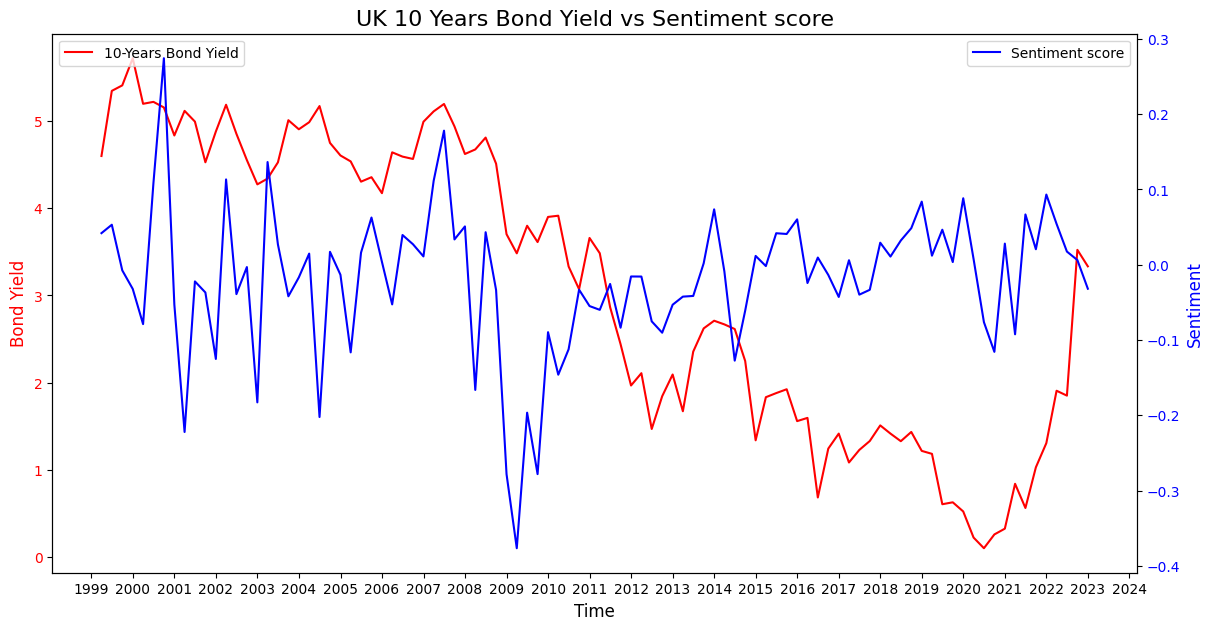

In [56]:
# Set the frame size
fig, ax1 = plt.subplots(figsize=(14, 7))

# Create the first line plot
ax1.plot(quarterly_ten_year_bond_after2000['Date'], quarterly_ten_year_bond_after2000['Price'], color='red', linestyle='-', label='10-Years Bond Yield')
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Bond Yield', fontsize=12, color='r')
ax1.tick_params(axis='y', labelcolor='r')

# Create the second y-axis
ax2 = ax1.twinx()
ax2.plot(quart_bert_after2000['Date'], quart_bert_after2000['finbert_score'], color='blue', linestyle='-', label='Sentiment score')
ax2.set_ylabel('Sentiment', fontsize=12, color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Set the title
plt.title('UK 10 Years Bond Yield vs Sentiment score', fontsize=16)

# Set the x-axis tick frequency to show ticks at every year
locator = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# Increase the number of x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [57]:
# Export dataset for team members for analysis
quarterly_ten_year_bond_after2000.to_csv('10_Years_Bond.csv', index=False)
quart_bert_after2000.to_csv('Bond_Sentiment.csv', index=False)


### Split the data into different timeframe for overall project analysis

In [58]:
# Split data into 2007-2010 and 2018-2022
quarterly_ten_year_bond_2007_2010 = quarterly_ten_year_bond_after2000[(quarterly_ten_year_bond_after2000['Date'] > '2006-12-31'\
                                                                      ) & (quarterly_ten_year_bond_after2000['Date'] < '2011-01-01')]
quart_bert_2007_2010 = quart_bert_after2000[(quart_bert_after2000['Date'] > '2006-12-31'\
                                            ) & (quart_bert_after2000['Date'] < '2011-01-01')]
quarterly_ten_year_bond_2018_2022 = quarterly_ten_year_bond_after2000[(quarterly_ten_year_bond_after2000['Date'] > '2017-12-31'\
                                                                      ) & (quarterly_ten_year_bond_after2000['Date'] < '2023-01-01')]
quart_bert_2018_2022 = quart_bert_after2000[(quart_bert_after2000['Date'] > '2017-12-31'\
                                            ) & (quart_bert_after2000['Date'] < '2023-01-01')]

print(quarterly_ten_year_bond_2007_2010)
print(quart_bert_2007_2010)
print(quarterly_ten_year_bond_2018_2022)
print(quart_bert_2018_2022)

         Date  Price
32 2007-03-31  5.109
33 2007-06-30  5.194
34 2007-09-30  4.937
35 2007-12-31  4.621
36 2008-03-31  4.673
37 2008-06-30  4.809
38 2008-09-30  4.510
39 2008-12-31  3.702
40 2009-03-31  3.483
41 2009-06-30  3.799
42 2009-09-30  3.612
43 2009-12-31  3.900
44 2010-03-31  3.914
45 2010-06-30  3.332
46 2010-09-30  3.072
47 2010-12-31  3.659
         Date  finbert_score
34 2007-03-31       0.111425
35 2007-06-30       0.177961
36 2007-09-30       0.033574
37 2007-12-31       0.050853
38 2008-03-31      -0.166240
39 2008-06-30       0.043147
40 2008-09-30      -0.033596
41 2008-12-31      -0.278111
42 2009-03-31      -0.376372
43 2009-06-30      -0.196440
44 2009-09-30      -0.277979
45 2009-12-31      -0.089575
46 2010-03-31      -0.146002
47 2010-06-30      -0.112237
48 2010-09-30      -0.033147
49 2010-12-31      -0.054878
         Date  Price
76 2018-03-31  1.418
77 2018-06-30  1.331
78 2018-09-30  1.437
79 2018-12-31  1.220
80 2019-03-31  1.186
81 2019-06-30  0.609
82 

### 10 Years Bond Yield Hypothesis Testing and Correlation Analysis

In [59]:
# Merge the Bond Yield and Sentiment dataframes on 'Date'
Bond_10_Sentiment = pd.merge(quarterly_ten_year_bond_after2000, quart_bert_after2000, on='Date')

# Define independent variable (Rate) and dependent variable (score)
y = Bond_10_Sentiment['Price']
X = Bond_10_Sentiment['finbert_score']

# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2772
Date:                Sat, 16 Nov 2024   Prob (F-statistic):              0.600
Time:                        23:55:21   Log-Likelihood:                -184.50
No. Observations:                  96   AIC:                             373.0
Df Residuals:                      94   BIC:                             378.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.0861      0.174     17.703

In [60]:
# Calculate the Pearson correlation coefficient
correlation_coefficient = Bond_10_Sentiment['Price'].corr(Bond_10_Sentiment['finbert_score'])

# Print the correlation coefficient
print("10 Years Bond Yield & Sentiment Pearson correlation coefficient:", correlation_coefficient)

10 Years Bond Yield & Sentiment Pearson correlation coefficient: -0.05422907567201292


##### High P-value and low sign of correlation

In [61]:
# Merge the Bond Yield and Sentiment dataframes on 'Date'
Bond_10_Sentiment_2007_2010 = pd.merge(quarterly_ten_year_bond_2007_2010, quart_bert_2007_2010, on='Date')

# Define independent variable (Rate) and dependent variable (score)
y = Bond_10_Sentiment_2007_2010['Price']
X = Bond_10_Sentiment_2007_2010['finbert_score']

# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     12.86
Date:                Sat, 16 Nov 2024   Prob (F-statistic):            0.00298
Time:                        23:55:21   Log-Likelihood:                -10.805
No. Observations:                  16   AIC:                             25.61
Df Residuals:                      14   BIC:                             27.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.4064      0.146     30.094

In [62]:
# Calculate the Pearson correlation coefficient
correlation_coefficient = Bond_10_Sentiment_2007_2010['Price'].corr(Bond_10_Sentiment_2007_2010['finbert_score'])

# Print the correlation coefficient
print("10 Years Bond Yield & Sentiment Pearson correlation coefficient:", correlation_coefficient)

10 Years Bond Yield & Sentiment Pearson correlation coefficient: 0.6919132082296712


In [63]:
# Merge the Bond Yield and Sentiment dataframes on 'Date'
Bond_10_Sentiment_2018_2022 = pd.merge(quarterly_ten_year_bond_2018_2022, quart_bert_2018_2022, on='Date')

# Define independent variable (Rate) and dependent variable (score)
y = Bond_10_Sentiment_2018_2022['Price']
X = Bond_10_Sentiment_2018_2022['finbert_score']

# Add a constant to the independent variables (required for statsmodels)
X = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.047
Method:                 Least Squares   F-statistic:                    0.1418
Date:                Sat, 16 Nov 2024   Prob (F-statistic):              0.711
Time:                        23:55:21   Log-Likelihood:                -26.361
No. Observations:                  20   AIC:                             56.72
Df Residuals:                      18   BIC:                             58.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1608      0.221      5.258

In [64]:
# Calculate the Pearson correlation coefficient
correlation_coefficient = Bond_10_Sentiment_2018_2022['Price'].corr(Bond_10_Sentiment_2018_2022['finbert_score'])

# Print the correlation coefficient
print("10 Years Bond Yield & Sentiment Pearson correlation coefficient:", correlation_coefficient)

10 Years Bond Yield & Sentiment Pearson correlation coefficient: 0.0884007361771277
